# Practical Machine Learning                                                                             
# Lab 1

## Exercises

### 1.[Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/images.zip), we have 8 images, read the images, flatten them, then store them in a numpy array. Before storing the images divide them by 255.
The numpy array should have the dimension equals to (8, 12288), in order to check the dimension use the $shape$ attribute.

In [30]:
 # write your code here
import os
import numpy as np
from PIL import Image

image_paths = os.listdir("images")
image_paths = [ "images/" + x for x in image_paths]
# print(image_paths)

img_array = []
for path in image_paths:
    img = Image.open(path)
    img_array.append(np.ravel(np.array(img) / 255))

img_array = np.array(img_array)
print(img_array.shape)

(8, 12288)


### 2. Compute the mean of the images. 

In [37]:
# write your code here

mean = np.mean(img_array, axis=0)
print(mean)

[-0.16880952 -0.0962605  -0.21390756 ... -0.06439775 -0.0340056
 -0.10459383]


### 3. Normalize the images by subtracting the mean from each image.

In [42]:
# write your code here
normalized = img_array - mean
print(normalized)

[[-0.20980392 -0.34509804 -0.22352941 ... -0.09460784 -0.19558824
  -0.16813725]
 [-0.09607843 -0.09411765  0.11764706 ...  0.10539216  0.075
   0.16127451]
 [ 0.00196078 -0.04705882 -0.05098039 ...  0.21519608  0.21617647
   0.03578431]
 ...
 [-0.24117647 -0.24313725 -0.19607843 ... -0.36911765 -0.40343137
  -0.325     ]
 [-0.22156863  0.01568627  0.34117647 ...  0.09754902  0.25147059
   0.42009804]
 [ 0.06470588  0.03921569 -0.05098039 ...  0.40343137  0.25147059
   0.20833333]]


### 4. [Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/weights.zip), we have the weights and the bias for a perceptron that classifies the images in 4 classes. Use the weights (use np.load(‘path’) to load the weights) and the images (after normalization) to compute (y_hat) the predictions of the perceptron.  
  $$ y_{hat} = softmax(X * W + b) $$
  $$ X - input, W - weights, b - bias $$
  $$Softmax(z_i)=\frac{e^{z_i}}{\sum_{j=1}^{j=K} e^{z_j} }$$

In [48]:
# write your code here
weights = np.load("coefs.npy")
bias = np.load("bias.npy")

print(weights.shape)
print(bias.shape)

(12288, 4)
(4,)


In [49]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

In [52]:

z = np.dot(normalized, weights) + bias
a = softmax(z)

y_pred = np.argmax(a, axis=1)
print(y_pred)

[0 0 1 1 2 2 3 2]


### 5. Let the ground-truth labels be y = [0, 0, 1, 1, 2,  2, 3,  3]. Compute the accuracy of the classifier (define a new function accuracy_score). 
$$Accuracy = \frac{1}{n} \sum_{i=1}^{j=n} y_{pred}^i == y_{true}^i$$

In [54]:
# write your code here 
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [56]:
y_true = [0, 0, 1, 1, 2, 2, 3, 3]
print("Accuracy: ", accuracy(y_true, y_pred))

Accuracy:  0.875


### 6. The labels of the classes are: (Cat - 0,  Dog - 1, Frog - 2,  Horse - 3), print the label for each prediction (use a dictionary). 


In [57]:
# write your code here
labels = {0: "cat", 1: "dog", 2: "frog", 3: "horse"}
for i in range(4):
    print("class %d has label %s" % (i, labels[i]))

class 0 has label cat
class 1 has label dog
class 2 has label frog
class 3 has label horse


### 7. Display the mean image (use imshow from Matplotlib).
#### Don’t forget to multiply the image by 255, then convert the image to uint8.

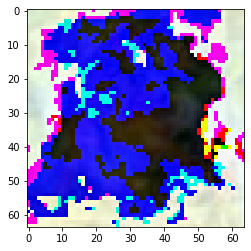

In [60]:
# write your code here
import matplotlib.pyplot as plt

final_img = mean.reshape((64, 64, 3))
plt.imshow(np.uint8(final_img * 255))
plt.show()